# GET TO KNOW THE DATASET

1. Load dataset
2. EDA and Data Visualization
3. Outlier Handling

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

In [ ]:


df = pd.read_csv("listings.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37541 entries, 0 to 37540
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              37541 non-null  int64  
 1   name                            37539 non-null  object 
 2   host_id                         37541 non-null  int64  
 3   host_name                       37536 non-null  object 
 4   neighbourhood_group             37541 non-null  object 
 5   neighbourhood                   37541 non-null  object 
 6   latitude                        37541 non-null  float64
 7   longitude                       37541 non-null  float64
 8   room_type                       37541 non-null  object 
 9   price                           22790 non-null  float64
 10  minimum_nights                  37541 non-null  int64  
 11  number_of_reviews               37541 non-null  int64  
 12  last_review                     

In [ ]:
df.shape

(37541, 18)

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.754100e+04,3.754100e+04,37541.000000,37541.000000,22790.000000,37541.00000,37541.00000,26001.000000,37541.000000,37541.000000,37541.000000
mean,3.783277e+17,1.682797e+08,40.728722,-73.946982,232.891795,28.98162,25.23449,0.892457,56.169974,152.796596,3.564450
std,4.643902e+17,1.820582e+08,0.056340,0.054604,1019.738134,30.70918,60.17222,1.864734,170.598777,142.535239,16.978104
min,2.595000e+03,1.678000e+03,40.500366,-74.251907,8.000000,1.00000,0.00000,0.010000,1.000000,0.000000,0.000000
25%,2.063928e+07,1.705622e+07,40.688491,-73.983108,85.000000,30.00000,0.00000,0.090000,1.000000,0.000000,0.000000
50%,4.866104e+07,8.415508e+07,40.726090,-73.954540,147.000000,30.00000,3.00000,0.320000,2.000000,128.000000,0.000000
75%,8.450413e+17,3.052402e+08,40.762380,-73.927800,250.000000,30.00000,21.00000,1.070000,8.000000,294.000000,2.000000
max,1.237702e+18,5.992925e+08,40.911390,-73.713650,100000.000000,1250.00000,1941.00000,110.100000,876.000000,365.000000,1772.000000


For cases where the neighbourhood does not have a median (the property is the only one in the neighbourhood, or hte property does not have a neighbourhood), fill the missing values using the median of the respective columns that the values are in.


## EDA
Visual checks for the balance of data and if further interventions must be performed for a more meaningful analytics

Clean Price as it is the target variable
1. Fill out missing price with neighbourhood_group median
2. For the case that does not have the neighbourhood median, fill it with the column median

In [ ]:
# Calculate neighborhood-specific medians for 'price', 'service fee', and 'minimum nights'
neighborhood_medians = df.groupby('neighbourhood')[['price']].transform('median')

# Fill missing values in each column with the neighborhood-specific median
df['price'].fillna(neighborhood_medians['price'], inplace=True)



<ipython-input-5-1a6ea9ca5172>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(neighborhood_medians['price'], inplace=True)


In [ ]:
median_price = df['price'].median()

df['price'].fillna(median_price, inplace=True)


<ipython-input-6-5eb758b1aa1a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(median_price, inplace=True)


## Visulizations

In [ ]:
average_price_by_neighbourhood = df.groupby('neighbourhood_group')['price'].mean()

# Display the result
print(average_price_by_neighbourhood)


neighbourhood_group
Bronx            112.495070
Brooklyn         169.821215
Manhattan        273.910879
Queens           118.125743
Staten Island    127.064384
Name: price, dtype: float64


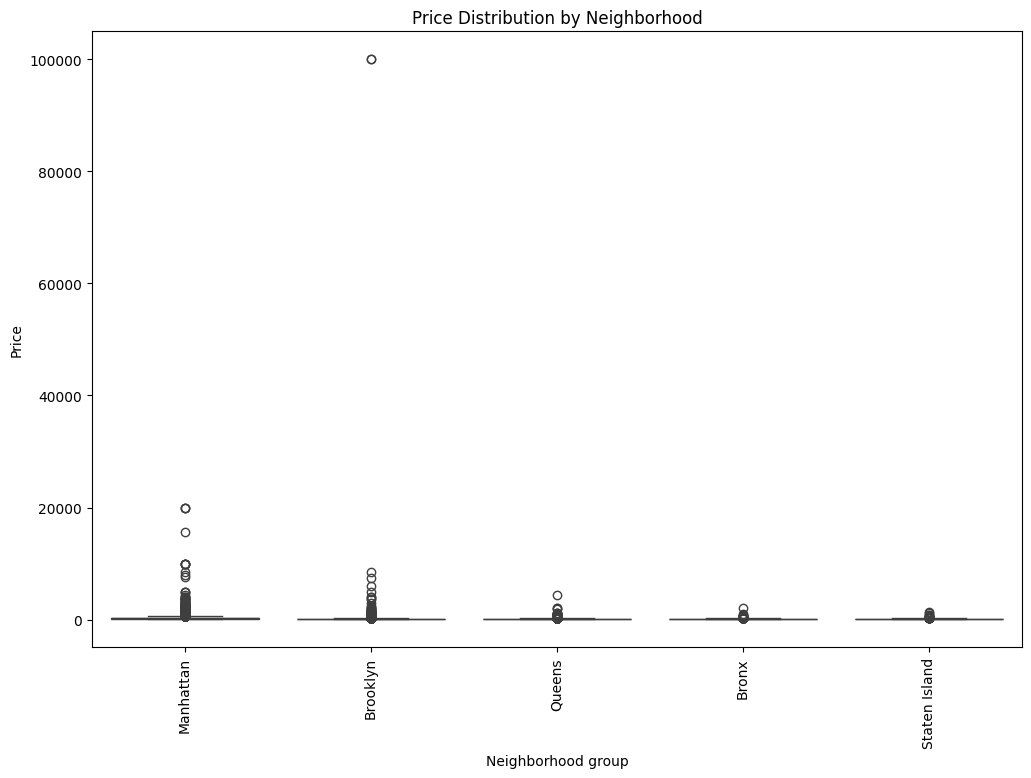

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of 'price' by 'neighbourhood' using a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='neighbourhood_group', y='price')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.title("Price Distribution by Neighborhood")
plt.xlabel("Neighborhood group")
plt.ylabel("Price")
plt.show()


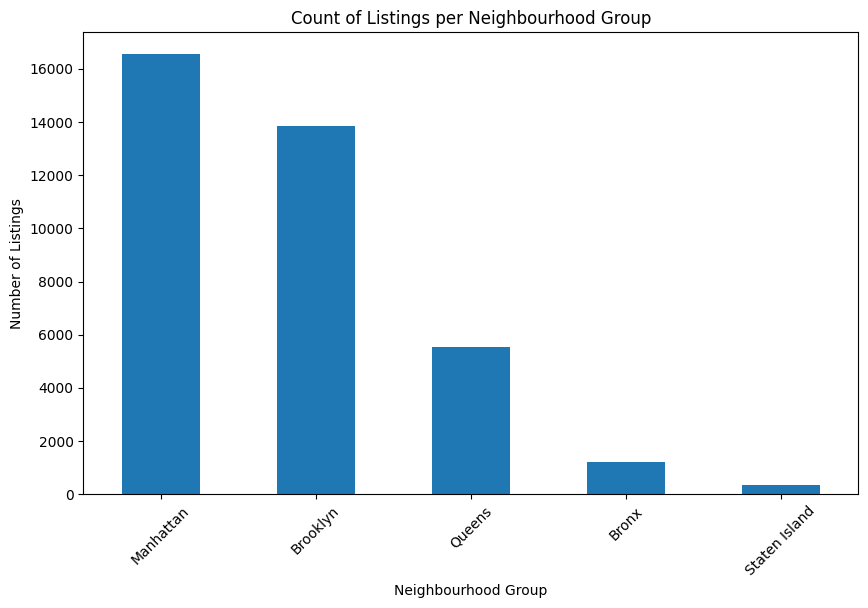

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has been loaded with a 'neighbourhood' column
# Count the number of listings per neighbourhood
neighbourhood_counts = df['neighbourhood_group'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
neighbourhood_counts.plot(kind='bar')
plt.title('Count of Listings per Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()


<Axes: xlabel='availability_bins', ylabel='price'>

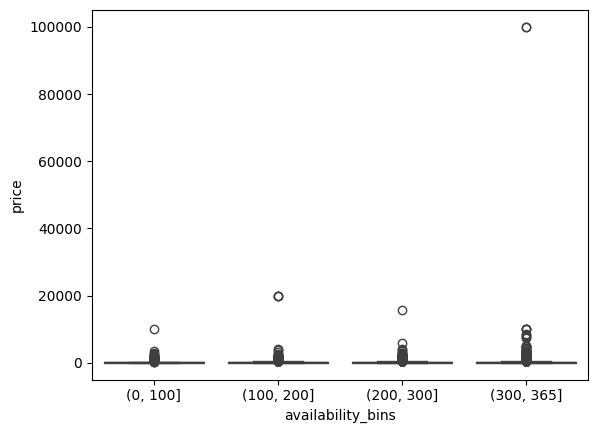

In [ ]:
df['availability_bins'] = pd.cut(df['availability_365'], bins=[0, 100, 200, 300, 365])
sns.boxplot(x='availability_bins', y='price', data=df)


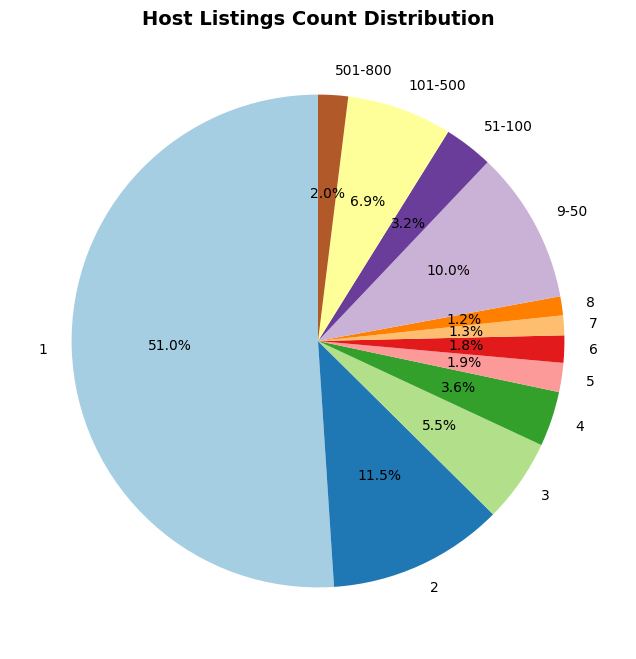

In [ ]:
import matplotlib.pyplot as plt

bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 50, 100, 500, 800]
labels = [ '1', '2', '3', '4', '5', '6', '7', '8', '9-50', '51-100', '101-500', '501-800']

# Bin the data
df['host_listings_binned'] = pd.cut(df['calculated_host_listings_count'], bins=bins, labels=labels, include_lowest=True)

# Count the occurrences in each bin
bin_counts = df['host_listings_binned'].value_counts().sort_index()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(bin_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add a title
plt.title('Host Listings Count Distribution', fontsize=14, weight='bold')

# Display the pie chart
plt.show()


# Outliers

In [ ]:
# Understand outlier distribution
print("Minimum Nights Statistics:")
print(df['minimum_nights'].describe([0.01, 0.05, 0.25, 0.75, 0.95, 0.99]))

print("\nCalculated Host Listings Statistics:")
print(df['calculated_host_listings_count'].describe([0.01, 0.05, 0.25, 0.75, 0.95, 0.99]))

print("\nNumber of Review Statistics:")
print(df['number_of_reviews'].describe([0.01, 0.05, 0.25, 0.75, 0.95, 0.99]))

print("\nNumber of Reviews per Month Statistics:")
print(df['reviews_per_month'].describe([0.01, 0.05, 0.25, 0.75, 0.95, 0.99]))

Minimum Nights Statistics:
count    37541.00000
mean        28.98162
std         30.70918
min          1.00000
1%           1.00000
5%           1.00000
25%         30.00000
50%         30.00000
75%         30.00000
95%         31.00000
99%         90.00000
max       1250.00000
Name: minimum_nights, dtype: float64

Calculated Host Listings Statistics:
count    37541.000000
mean        56.169974
std        170.598777
min          1.000000
1%           1.000000
5%           1.000000
25%          1.000000
50%          2.000000
75%          8.000000
95%        354.000000
99%        876.000000
max        876.000000
Name: calculated_host_listings_count, dtype: float64

Number of Review Statistics:
count    37541.00000
mean        25.23449
std         60.17222
min          0.00000
1%           0.00000
5%           0.00000
25%          0.00000
50%          3.00000
75%         21.00000
95%        129.00000
99%        274.60000
max       1941.00000
Name: number_of_reviews, dtype: float64

Number

In [ ]:
# Calculate the 99th percentile (top 10%) of 'minimum_nights'
threshold = df['minimum_nights'].quantile(0.99)

# Drop rows in place where 'minimum_nights' is greater than the 90th percentile
df.drop(df[df['minimum_nights'] > threshold].index, inplace=True)

In [ ]:
# Calculate the 99th percentile (top 10%) of 'number_of_reviews'
threshold = df['number_of_reviews'].quantile(0.99)

# Drop rows in place where 'minimum_nights' is greater than the 90th percentile
df.drop(df[df['number_of_reviews'] > threshold].index, inplace=True)



In [ ]:
# Calculate the 99th percentile (top 10%) of 'reviews_per_month'
threshold = df['reviews_per_month'].quantile(0.99)

# Drop rows in place where 'minimum_nights' is greater than the 90th percentile
df.drop(df[df['reviews_per_month'] > threshold].index, inplace=True)


In [ ]:
# First, find the host_id that has 876 listings
host_with_876_listings = df.groupby('host_id').size()

# Find the host_id(s) with exactly 876 listings
host_876 = host_with_876_listings[host_with_876_listings == 876]

# Display the host_id(s) with 876 listings
print(f"Host IDs with 876 listings: {host_876.index.tolist()}")



Host IDs with 876 listings: [107434423]


In [ ]:
# Count the number of listings associated with host_id 107434423
host_id_107434423_count = df[df['host_id'] == 107434423].shape[0]

# Display the result
host_id_107434423_count


876

### Time from Last Review

In [ ]:

# Convert 'last_review' to datetime format
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Calculate the time difference from the current date
df['time_from_last_review'] = (pd.to_datetime('today') - df['last_review']).dt.days

df['time_from_last_review'].fillna(9999, inplace=True)

# Check the result
print(df[['last_review', 'time_from_last_review']].head())


  last_review  time_from_last_review
0  2024-08-02                  125.0
1         NaT                 9999.0
2  2019-09-28                 1895.0
3  2024-07-30                  128.0
4         NaT                 9999.0


<ipython-input-18-dd128c1e1b3b>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['time_from_last_review'].fillna(9999, inplace=True)


(0.0, 10000.0)

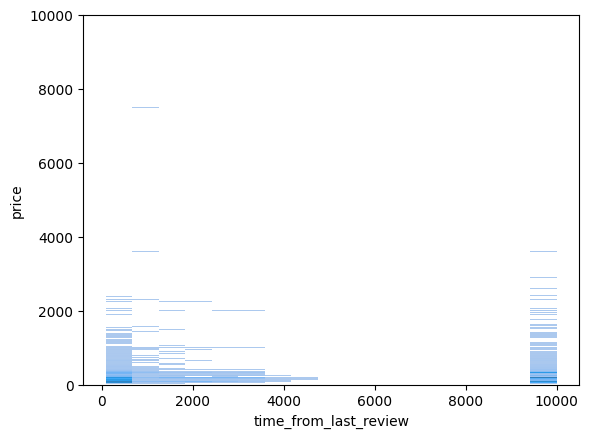

In [ ]:
sns.histplot(x='time_from_last_review', y='price', data=df)
plt.ylim(0, 10000)


## HANDLING OUTLIERS

## Price Outliers

In [ ]:
# Calculate IQR for 'price'
q1 = df['price'].quantile(0.25)  # First quartile (25%)
q3 = df['price'].quantile(0.75)  # Third quartile (75%)
iqr = q3 - q1  # Interquartile range

# Define outlier bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Find outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Display outliers
print("Number of outliers:", len(outliers))
print(outliers)


Number of outliers: 2963
                        id                                               name  \
6       725482656106188093                Gorgeous ! Amazing! Rasta palace ….   
13      760086536368275287  Luxury apt in the best location of E. Williams...   
14     1043748746630664860      Accent chairs, custom closets and local views   
51                16561213                       New york Multi-unit building   
67                 2999527                One-of-a-Kind Luxury NYC EPIC VIEW!   
...                    ...                                                ...   
37363              3848825           NYC Private Room LES Convenient Location   
37375             45705785                    Chateau Estate in New York City   
37404  1034897833823176761    Entire 2 bedrooms Apt Short Walk to UN/Times Sq   
37407             14110407        Relaxing Ocean Front Beach Home in Arverne!   
37504   645426662953840812  Cozy guest suite. Clean, comfy, private and quiet   

  

In [ ]:
# Sort the listings by price in descending order
most_expensive_listings = df.sort_values(by='price', ascending=False)

# Display the top 10 most expensive listings
top_10_most_expensive = most_expensive_listings.head(10)

# Show the relevant columns for investigation (e.g., id, name, price, neighbourhood, room type)
print(top_10_most_expensive[['name', 'host_name','price', 'neighbourhood_group', 'room_type']])



                                                    name  host_name     price  \
8856   Spacious ROOM on the 3fl of a Bedstuy Brownestone      Bobbi  100000.0   
8070   Clean and COZY Private room 3rdfl of a  BROWNS...      Bobbi  100000.0   
9327                  2 Connecting Hotel Suites - 2 beds  Suiteness   20000.0   
9699                      1-Bedroom Hotel Suite - 2 beds  Suiteness   20000.0   
9684                       1-Bedroom Hotel Suite - 1 bed  Suiteness   20000.0   
35305                   Real Housewives Star NY Townhome      Urban   15618.0   
2145                              Four Bedroom Penthouse     Lilian   10000.0   
9267           Lux Studio on Wall Street. Heart of Fidi!      Chris   10000.0   
14991           Eighth House, State of the Art NYC Venue       Joel   10000.0   
13820                                 North Gallery Café       Joel   10000.0   

      neighbourhood_group        room_type  
8856             Brooklyn     Private room  
8070             B

In [ ]:
# Identify the IDs of the top 2 most expensive listings
ids_to_drop = df[df['price'] == 100000.000000	].head(2)['id']

# Drop the rows by their IDs in place
df.drop(df[df['id'].isin(ids_to_drop)].index, inplace=True)

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,time_from_last_review
count,3.658100e+04,3.658100e+04,36581.000000,36581.000000,36581.000000,36581.000000,36581.000000,25187,25187.000000,36581.000000,36581.000000,36581.000000,36581.000000
mean,3.796403e+17,1.681046e+08,40.728838,-73.946968,200.674654,27.172139,20.969274,2022-05-20 20:08:13.397387520,0.740749,57.475985,152.021186,2.687379,3754.172467
min,2.595000e+03,1.678000e+03,40.500366,-74.251907,8.000000,1.000000,0.000000,2011-05-12 00:00:00,0.010000,1.000000,0.000000,0.000000,92.000000
25%,2.093406e+07,1.724940e+07,40.688590,-73.982930,96.000000,30.000000,0.000000,2020-03-10 00:00:00,0.090000,1.000000,0.000000,0.000000,296.000000
50%,4.889111e+07,8.451041e+07,40.726150,-73.954500,150.000000,30.000000,3.000000,2023-09-09 00:00:00,0.300000,2.000000,126.000000,0.000000,1466.000000
75%,8.455933e+17,3.052402e+08,40.762470,-73.927810,217.000000,30.000000,20.000000,2024-06-30 00:00:00,1.000000,8.000000,293.000000,2.000000,9999.000000
max,1.237702e+18,5.992925e+08,40.911390,-73.713650,20000.000000,90.000000,275.000000,2024-09-04 00:00:00,5.520000,876.000000,365.000000,127.000000,9999.000000
std,4.644136e+17,1.816979e+08,0.056431,0.054465,326.616746,11.536913,41.623070,NaN,0.986926,172.603032,142.751986,7.649396,4280.733816


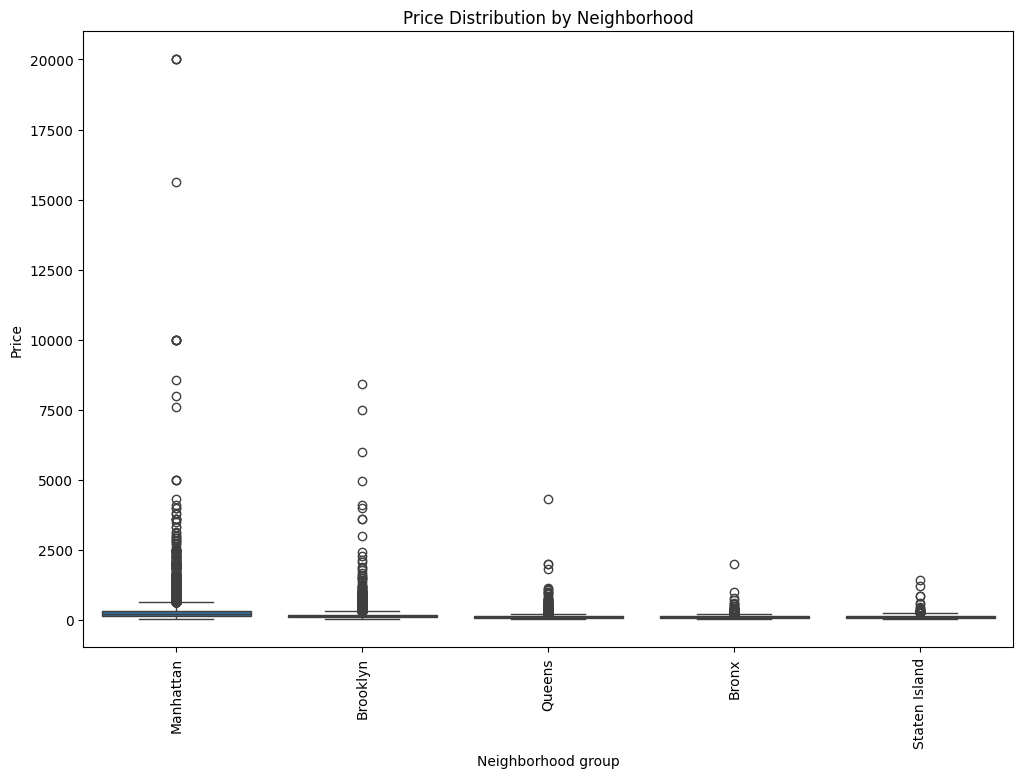

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of 'price' by 'neighbourhood' using a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='neighbourhood_group', y='price')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.title("Price Distribution by Neighborhood")
plt.xlabel("Neighborhood group")
plt.ylabel("Price")
plt.show()


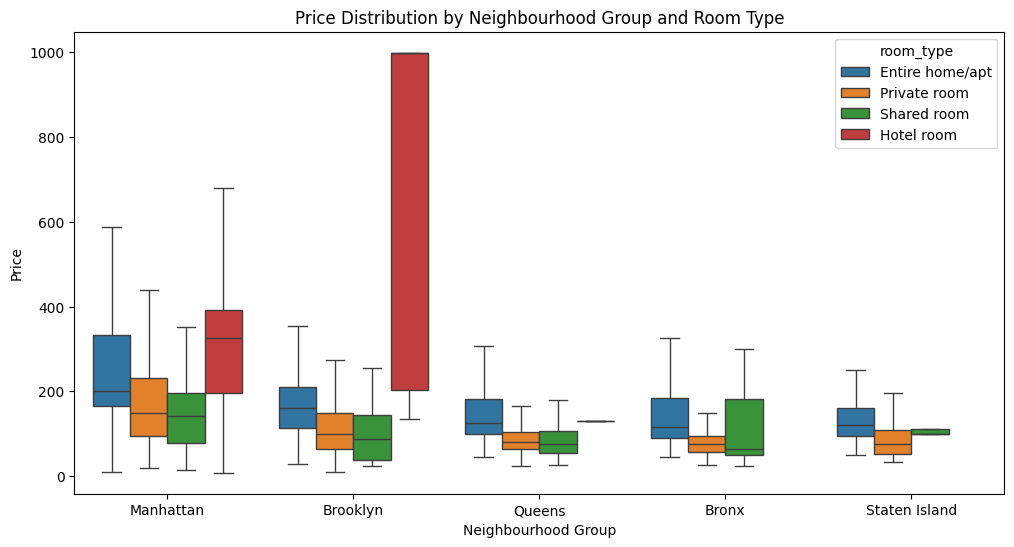

In [ ]:
plt.figure(figsize=(12, 6))

# Create the boxplot for price by neighbourhood group and room type
sns.boxplot(x='neighbourhood_group', y='price', hue='room_type', data=df, showfliers=False)

# Add labels and title
plt.title('Price Distribution by Neighbourhood Group and Room Type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')

# Display the plot
plt.show()

# Price Normalization

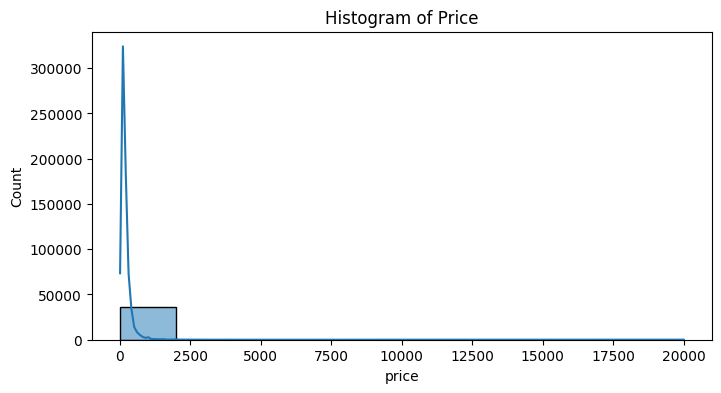

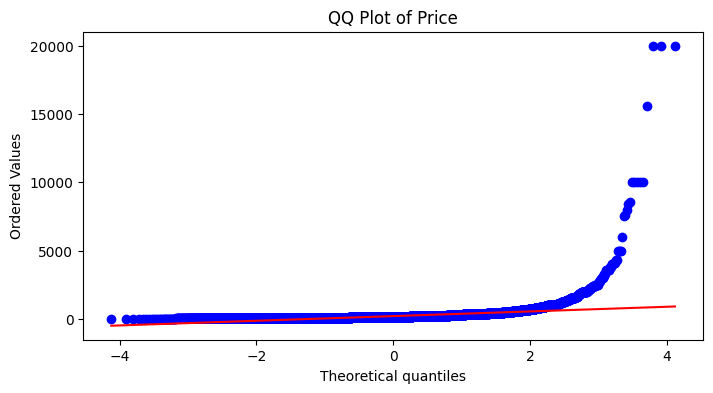

In [ ]:
import scipy.stats as stats

# Histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['price'], bins=10, kde=True)
plt.title("Histogram of Price")
plt.show()


# QQ Plot
plt.figure(figsize=(8, 4))
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title("QQ Plot of Price")
plt.show()


<ipython-input-26-8f6f2d9d9f1b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_log'], fit=norm)


Text(0.5, 1.0, 'Log-Price Distribution Plot')

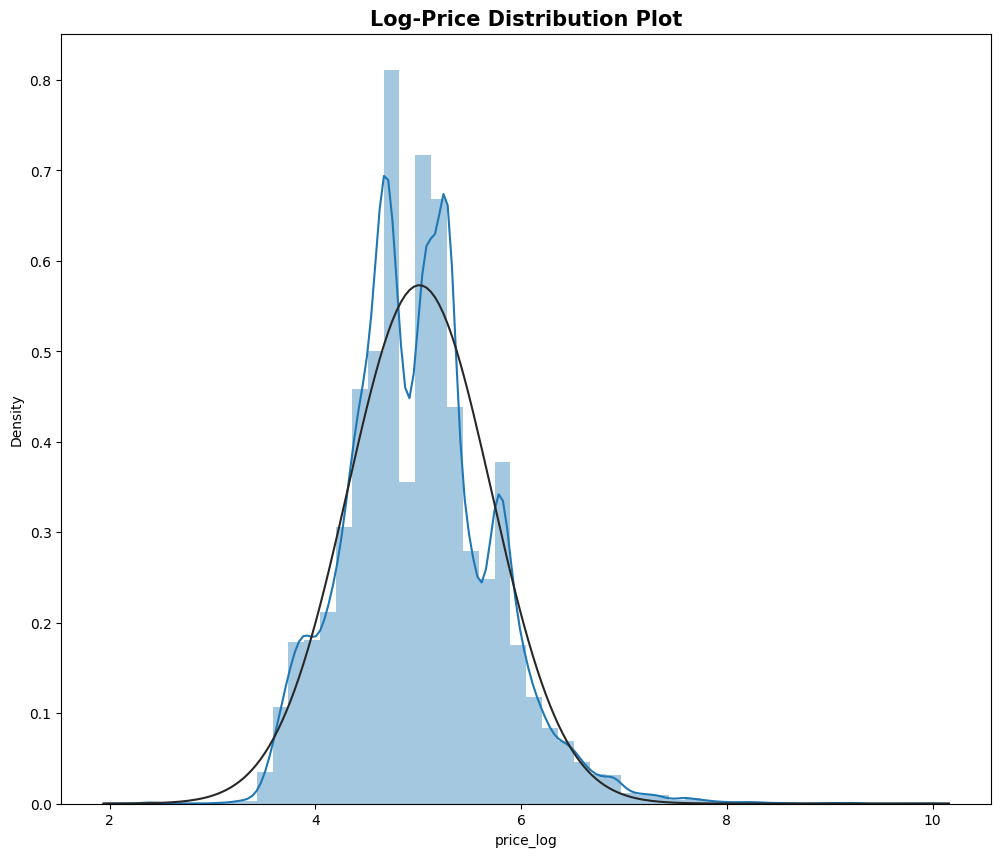

In [ ]:
df['price_log'] = np.log(df.price+1)
plt.figure(figsize=(12,10))
sns.distplot(df['price_log'], fit=norm)
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

# Original Models

## MULTIPLE LINEAR REGRESSION

*italicized text*
The first iteration incorporates all columns that could be critical and confounded

In [ ]:
df.drop(columns=['name','id' ,'host_id','host_name', 'price'], inplace=True)

df.isnull().sum()

,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
minimum_nights,0
number_of_reviews,0
last_review,11394
reviews_per_month,11394
calculated_host_listings_count,0


In [ ]:
mean = df['reviews_per_month'].mean()
df['reviews_per_month'].fillna(mean, inplace=True)
df.isnull().sum()


<ipython-input-28-14d96505da05>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(mean, inplace=True)


,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
minimum_nights,0
number_of_reviews,0
last_review,11394
reviews_per_month,0
calculated_host_listings_count,0


In [ ]:
df = df.drop(columns=['license'])
df.isnull().sum()

,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
minimum_nights,0
number_of_reviews,0
last_review,11394
reviews_per_month,0
calculated_host_listings_count,0


In [ ]:
df = df.drop(columns=['last_review', 'availability_bins', 'host_listings_binned'])
df.isnull().sum()


,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
minimum_nights,0
number_of_reviews,0
reviews_per_month,0
calculated_host_listings_count,0
availability_365,0


Text(0.5, 1.0, 'Correlation Matrix')

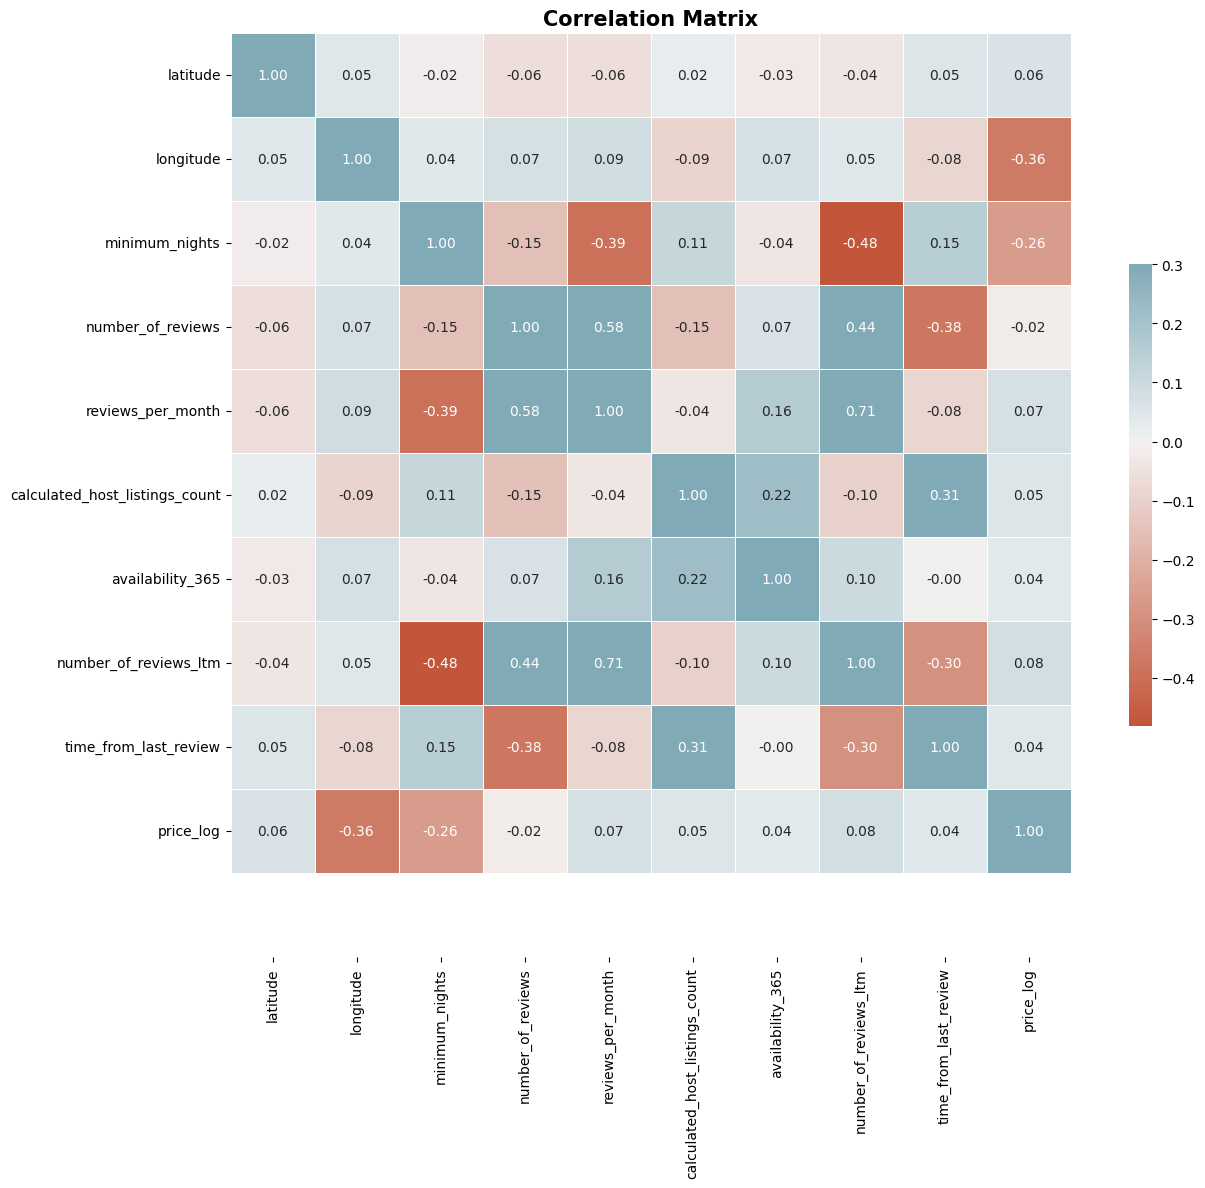

In [ ]:
plt.figure(figsize=(15,12))
palette = sns.diverging_palette(20, 220, n=256)
corr=df.corr(method='pearson', numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(11, 0))
plt.title("Correlation Matrix",size=15, weight='bold')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36581 entries, 0 to 37540
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             36581 non-null  object 
 1   neighbourhood                   36581 non-null  object 
 2   latitude                        36581 non-null  float64
 3   longitude                       36581 non-null  float64
 4   room_type                       36581 non-null  object 
 5   minimum_nights                  36581 non-null  int64  
 6   number_of_reviews               36581 non-null  int64  
 7   reviews_per_month               36581 non-null  float64
 8   calculated_host_listings_count  36581 non-null  int64  
 9   availability_365                36581 non-null  int64  
 10  number_of_reviews_ltm           36581 non-null  int64  
 11  time_from_last_review           36581 non-null  float64
 12  price_log                       36581

In [ ]:
import statsmodels.api as sm

# Select only numeric columns for the features
numeric_cols = df.select_dtypes(include=['number']).columns

# Exclude the target variable 'price_log' from the features
X = df[numeric_cols].drop(columns=['price_log'])  # Drop target column from features
y = df['price_log']  # Target variable

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the OLS model
ols_model = sm.OLS(y, X).fit()

# Get the summary of the model
ols_model_summary = ols_model.summary()

# Display the model summary
print(ols_model_summary)


                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     1039.
Date:                Thu, 05 Dec 2024   Prob (F-statistic):               0.00
Time:                        06:21:31   Log-Likelihood:                -34488.
No. Observations:               36581   AIC:                         6.900e+04
Df Residuals:                   36571   BIC:                         6.908e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [ ]:
df_no_neighbourhood = df.drop(columns=['neighbourhood'])

In [ ]:
df_encoded = pd.get_dummies(df_no_neighbourhood, columns=['neighbourhood_group', 'room_type'], drop_first=True)
df_encoded = df_encoded.astype(float)


# Define the features (X) and target (y)
X = df_encoded.drop(columns=['price_log'])  # Drop target variable 'price_log' from encoded DataFrame
y = df_encoded['price_log']  # Target variable



# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the training and test set features (for the intercept)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the OLS model on the training data
ols_model = sm.OLS(y_train, X_train).fit()

# Get the summary of the model
ols_model_summary = ols_model.summary()

# Display the model summary
print(ols_model_summary)

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     1246.
Date:                Thu, 05 Dec 2024   Prob (F-statistic):               0.00
Time:                        06:21:31   Log-Likelihood:                -23347.
No. Observations:               29264   AIC:                         4.673e+04
Df Residuals:                   29247   BIC:                         4.687e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

## Random Forest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



# Define the features (X) and target (y)
X = df_encoded.drop(columns=['price_log'])  # Drop target variable 'price_log' from encoded DataFrame
y = df_encoded['price_log']


# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Optionally, print feature importances to understand the model better
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print("\nFeature Importances:")
print(feature_importances.sort_values(ascending=False))


Mean Squared Error (MSE): 0.12163197122082528
R-squared (R²): 0.746534402536078

Feature Importances:
longitude                            0.335062
latitude                             0.163937
calculated_host_listings_count       0.111202
availability_365                     0.104670
room_type_Private room               0.104622
minimum_nights                       0.059729
time_from_last_review                0.041883
reviews_per_month                    0.027904
number_of_reviews                    0.023990
number_of_reviews_ltm                0.010839
room_type_Shared room                0.010762
neighbourhood_group_Brooklyn         0.001875
neighbourhood_group_Queens           0.001531
neighbourhood_group_Manhattan        0.001509
room_type_Hotel room                 0.000404
neighbourhood_group_Staten Island    0.000081
dtype: float64


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming df_encoded contains the preprocessed dataset with encoded features

# Define the features (X) and target (y)
X = df_encoded.drop(columns=['price_log'])  # Drop the target variable
y = df_encoded['price_log']  # Set 'price_log' as the target variable

# Split the data into train/test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R² score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 0.17018223183890077
R-squared (R²): 0.6453618186251573


## Elastic Net vs Ridge vs *LASSO*

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming df_encoded is the DataFrame containing the preprocessed data

# Define the features (X) and target (y)
X = df_encoded.drop(columns=['price_log'])  # Drop the target variable
y = df_encoded['price_log']  # Set 'price_log' as the target variable

# Split the data into train/test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
ridge_model = Ridge(alpha=1.0)  # You can tune the alpha parameter for Ridge
lasso_model = Lasso(alpha=0.1)  # You can tune the alpha parameter for Lasso
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # You can adjust alpha and l1_ratio

# Fit the models
ridge_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)
elasticnet_model.fit(X_train_scaled, y_train)

# Predict on the test set
ridge_pred = ridge_model.predict(X_test_scaled)
lasso_pred = lasso_model.predict(X_test_scaled)
elasticnet_pred = elasticnet_model.predict(X_test_scaled)

# Calculate MSE and R² for each model
ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
elasticnet_mse = mean_squared_error(y_test, elasticnet_pred)

ridge_r2 = r2_score(y_test, ridge_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
elasticnet_r2 = r2_score(y_test, elasticnet_pred)

# Print results
print("Ridge Regression: MSE =", ridge_mse, ", R² =", ridge_r2)
print("Lasso Regression: MSE =", lasso_mse, ", R² =", lasso_r2)
print("ElasticNet Regression: MSE =", elasticnet_mse, ", R² =", elasticnet_r2)


Ridge Regression: MSE = 0.2806015578464127 , R² = 0.4152619513193341
Lasso Regression: MSE = 0.32826838525211943 , R² = 0.31593033014826744
ElasticNet Regression: MSE = 0.3069750995047976 , R² = 0.3603028363219638


## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid with random values
param_dist = {
    'n_estimators': randint(100, 500),  # Random values for number of trees
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['log2'],
    'bootstrap': [True]
}

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", random_search.best_params_)

# Make predictions with the best model
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'bootstrap': True, 'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 438}
Mean Squared Error (MSE): 0.12223868965410487
R-squared (R²): 0.745270078291062


Apply Paramters

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

params = {
    'n_estimators': 359,  # Number of trees
    'max_depth': 40,  # Maximum depth of trees
    'max_features': 'sqrt',  # Features to consider when looking for the best split
    'min_samples_leaf': 1,  # Minimum number of samples required to be at a leaf node
    'min_samples_split': 4,  # Minimum number of samples required to split an internal node
}

# Define the features (X) and target (y)
X = df_encoded.drop(columns=['price_log'])  # Drop target variable 'price_log' from encoded DataFrame
y = df_encoded['price_log']


# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(
     random_state=42,
    n_estimators=params['n_estimators'],
    max_depth=params['max_depth'],
    max_features=params['max_features'],
    min_samples_leaf=params['min_samples_leaf'],
    min_samples_split=params['min_samples_split']
)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Optionally, print feature importances to understand the model better
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print("\nFeature Importances:")
print(feature_importances.sort_values(ascending=False))


Mean Squared Error (MSE): 0.12224114993703535
R-squared (R²): 0.745264951373553

Feature Importances:
longitude                            0.233495
latitude                             0.145700
room_type_Private room               0.121594
calculated_host_listings_count       0.105379
availability_365                     0.095704
minimum_nights                       0.068359
neighbourhood_group_Manhattan        0.062256
time_from_last_review                0.044271
reviews_per_month                    0.035237
number_of_reviews                    0.030773
number_of_reviews_ltm                0.021857
neighbourhood_group_Queens           0.012536
neighbourhood_group_Brooklyn         0.010857
room_type_Shared room                0.008936
room_type_Hotel room                 0.002121
neighbourhood_group_Staten Island    0.000924
dtype: float64


# Geogrpahic Clusterings

## K-Means

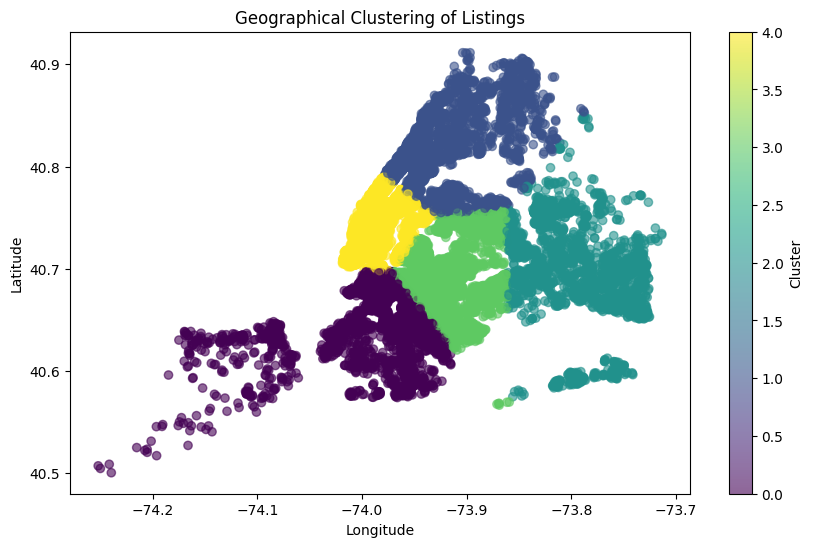

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract latitude and longitude for clustering
geo_data = df[['latitude', 'longitude']]

# Apply K-Means clustering (let's assume we want 5 clusters)
kmeans = KMeans(n_clusters=5, random_state=42)
df['geo_cluster'] = kmeans.fit_predict(geo_data)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['geo_cluster'], cmap='viridis', alpha=0.6)
plt.title('Geographical Clustering of Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()


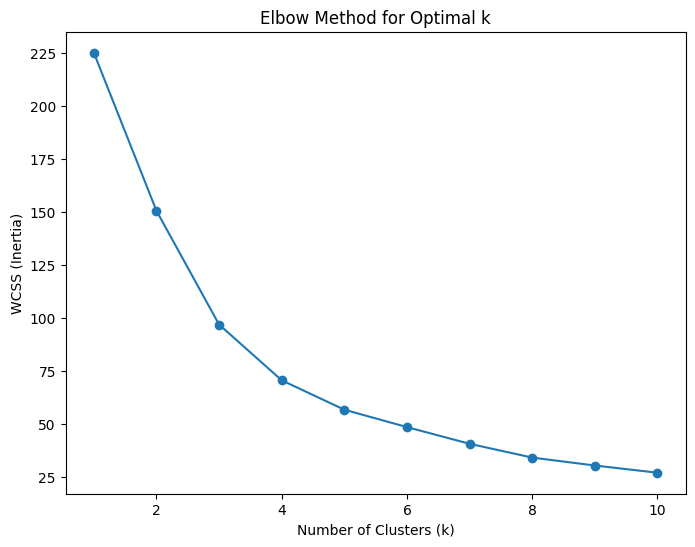

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Extract latitude and longitude for clustering (or any other features you want to use)
geo_data = df[['latitude', 'longitude']]

# Calculate WCSS (Within-Cluster Sum of Squares) for different values of k (1 to 10 clusters)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(geo_data)
    wcss.append(kmeans.inertia_)

# Plot the WCSS against the number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score
sil_score = silhouette_score(geo_data, df['geo_cluster'])

# Print the Silhouette Score
print(f"Silhouette Score for K-Means: {sil_score:.4f}")


Silhouette Score for K-Means: 0.4118


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Extract latitude and longitude for clustering
geo_data = df[['latitude', 'longitude']]

# Apply K-Means clustering (let's assume we want 5 clusters)
kmeans = KMeans(n_clusters=5, random_state=42)
df['geo_cluster'] = kmeans.fit_predict(geo_data)

# Now, calculate the mean, median, and mode of price_log for each cluster
cluster_stats = df.groupby('geo_cluster')['price_log'].agg(
    mean_price='mean',
    median_price='median',
    mode_price=lambda x: x.mode()[0]  # mode() returns a series, so we take the first value
).reset_index()

# Display the results
print(cluster_stats)


   geo_cluster  mean_price  median_price  mode_price
0            0    4.855197      4.795791    4.574711
1            1    4.778366      4.709530    4.709530
2            2    4.653657      4.615121    4.343805
3            3    4.705453      4.682131    5.081404
4            4    5.505788      5.398163    5.278115


## DBSCAN

Number of clusters: 8
Number of noise points: 12
Silhouette Score for DBSCAN: 0.4118


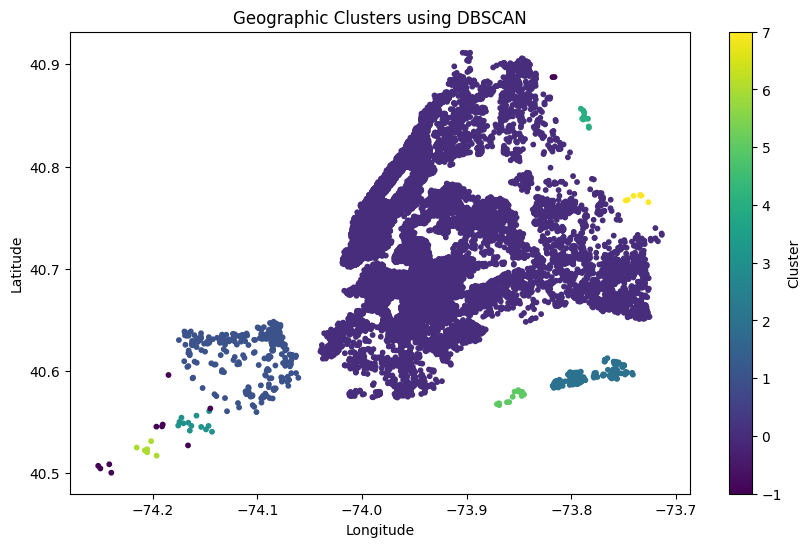

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.preprocessing import StandardScaler
geo_data_scaled = StandardScaler().fit_transform(geo_data)

# Initialize DBSCAN with parameters
dbscan = DBSCAN(eps=0.25, min_samples=5)  # You can adjust eps and min_samples

# Fit the DBSCAN model
df['geo_cluster'] = dbscan.fit_predict(geo_data_scaled)

# Display the number of clusters and noise points (-1 indicates noise)
print(f"Number of clusters: {len(set(df['geo_cluster'])) - (1 if -1 in df['geo_cluster'].values else 0)}")
print(f"Number of noise points: {(df['geo_cluster'] == -1).sum()}")

# Calculate the Silhouette Score
dbscan_score = silhouette_score(geo_data, df['geo_cluster'])

# Print the Silhouette Score
print(f"Silhouette Score for DBSCAN: {sil_score:.4f}")

# Visualize the clusters on a scatter plot (optional)
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['geo_cluster'], cmap='viridis', s=10)
plt.title('Geographic Clusters using DBSCAN')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()


# Apply Clusters to Random Forest

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36581 entries, 0 to 37540
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   latitude                           36581 non-null  float64
 1   longitude                          36581 non-null  float64
 2   minimum_nights                     36581 non-null  float64
 3   number_of_reviews                  36581 non-null  float64
 4   reviews_per_month                  36581 non-null  float64
 5   calculated_host_listings_count     36581 non-null  float64
 6   availability_365                   36581 non-null  float64
 7   number_of_reviews_ltm              36581 non-null  float64
 8   time_from_last_review              36581 non-null  float64
 9   price_log                          36581 non-null  float64
 10  neighbourhood_group_Brooklyn       36581 non-null  float64
 11  neighbourhood_group_Manhattan      36581 non-null  float64


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans


# Define the features (X) and target (y) for Random Forest
# Concatenate geo_cluster to the encoded DataFrame
df_encoded['geo_cluster'] = df['geo_cluster']
X = df_encoded.drop(columns=['price_log', 'longitude', 'latitude'])   # Drop 'price_log' target variable
y = df_encoded['price_log']  # Set 'price_log' as the target variable

#  Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

#  Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Optionally, print feature importances to understand which features contributed most
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print("\nFeature Importances:")
print(feature_importances.sort_values(ascending=False))


Mean Squared Error (MSE): 0.1965677512509419
R-squared (R²): 0.5903777435086976

Feature Importances:
room_type_Private room               0.190531
availability_365                     0.170422
calculated_host_listings_count       0.146881
minimum_nights                       0.119905
time_from_last_review                0.111422
neighbourhood_group_Manhattan        0.092112
reviews_per_month                    0.060986
number_of_reviews                    0.052786
number_of_reviews_ltm                0.018253
neighbourhood_group_Brooklyn         0.015052
room_type_Shared room                0.013945
neighbourhood_group_Queens           0.003113
geo_cluster                          0.002526
room_type_Hotel room                 0.001334
neighbourhood_group_Staten Island    0.000731
dtype: float64


# Apply Random Forest to Clusters

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36581 entries, 0 to 37540
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   latitude                           36581 non-null  float64
 1   longitude                          36581 non-null  float64
 2   minimum_nights                     36581 non-null  float64
 3   number_of_reviews                  36581 non-null  float64
 4   reviews_per_month                  36581 non-null  float64
 5   calculated_host_listings_count     36581 non-null  float64
 6   availability_365                   36581 non-null  float64
 7   number_of_reviews_ltm              36581 non-null  float64
 8   time_from_last_review              36581 non-null  float64
 9   price_log                          36581 non-null  float64
 10  neighbourhood_group_Brooklyn       36581 non-null  float64
 11  neighbourhood_group_Manhattan      36581 non-null  float64


In [ ]:
# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Store results for each cluster
results = {}

# Store feature importances for each cluster
cluster_top_features = {}

# Iterate over each cluster
for cluster_id in df['geo_cluster'].unique():
    # Filter data for the current cluster
    cluster_data = df_encoded[df_encoded['geo_cluster'] == cluster_id]
    X_cluster = cluster_data.drop(columns=['price_log', 'geo_cluster'])
    y_cluster = cluster_data['price_log']

    # Split the cluster data into train/test sets
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    # Train Random Forest model
    rf_model.fit(X_train, y_train)

    # Make predictions and evaluate the model
    y_pred = rf_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results for this cluster
    results[cluster_id] = {'MSE': mse, 'R²': r2}

    # Get feature importances and sort them to find the top 3 features
    feature_importances = pd.Series(rf_model.feature_importances_, index=X_cluster.columns)
    top_3_features = feature_importances.sort_values(ascending=False).head(3)

    # Store top 3 features for this cluster
    cluster_top_features[cluster_id] = top_3_features

# Print Summary of Results
print("\nSummary of Results:")
for cluster_id, metrics in results.items():
    print(f"Cluster {cluster_id}: MSE = {metrics['MSE']:.4f}, R² = {metrics['R²']:.4f}")

# Print Top 3 Features for Each Cluster
print("\nTop 3 Most Important Features for Each Cluster:")
for cluster_id, top_features in cluster_top_features.items():
    print(f"\nCluster {cluster_id}:")
    for feature, importance in top_features.items():
        print(f"{feature}: {importance:.4f}")


Summary of Results:
Cluster 0: MSE = 0.1348, R² = 0.7170
Cluster 1: MSE = 0.1470, R² = 0.4939
Cluster 2: MSE = 0.1722, R² = 0.4852
Cluster -1: MSE = 0.4390, R² = -84.7174
Cluster 3: MSE = 0.4262, R² = -1.4413
Cluster 4: MSE = 0.0889, R² = -10.4002
Cluster 5: MSE = 0.0402, R² = 0.0390
Cluster 6: MSE = 0.4114, R² = -0.8101
Cluster 7: MSE = 1.1182, R² = -2.9641

Top 3 Most Important Features for Each Cluster:

Cluster 0:
longitude: 0.3500
latitude: 0.1476
calculated_host_listings_count: 0.1151

Cluster 1:
longitude: 0.1731
room_type_Private room: 0.1652
latitude: 0.1343

Cluster 2:
availability_365: 0.2154
longitude: 0.1214
number_of_reviews: 0.1213

Cluster -1:
time_from_last_review: 0.3482
number_of_reviews: 0.2925
longitude: 0.1720

Cluster 3:
latitude: 0.2454
time_from_last_review: 0.1424
longitude: 0.1288

Cluster 4:
time_from_last_review: 0.2750
reviews_per_month: 0.2361
number_of_reviews: 0.1257

Cluster 5:
time_from_last_review: 0.6755
longitude: 0.0775
number_of_reviews: 0.0741


# Appy Linear Regression to Clusters

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36581 entries, 0 to 37540
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   latitude                           36581 non-null  float64
 1   longitude                          36581 non-null  float64
 2   minimum_nights                     36581 non-null  float64
 3   number_of_reviews                  36581 non-null  float64
 4   reviews_per_month                  36581 non-null  float64
 5   calculated_host_listings_count     36581 non-null  float64
 6   availability_365                   36581 non-null  float64
 7   number_of_reviews_ltm              36581 non-null  float64
 8   time_from_last_review              36581 non-null  float64
 9   price_log                          36581 non-null  float64
 10  neighbourhood_group_Brooklyn       36581 non-null  float64
 11  neighbourhood_group_Manhattan      36581 non-null  float64


In [ ]:
import statsmodels.api as sm
import pandas as pd

df_encoded['geo_cluster'] = df['geo_cluster']
# Initialize an empty dictionary to store results for each cluster
cluster_results = {}

# Iterate over each unique cluster
for cluster_id in df_encoded['geo_cluster'].unique():
    # Subset data for the current cluster
    cluster_data = df_encoded[df_encoded['geo_cluster'] == cluster_id]

    # Define your independent variables (X) and dependent variable (y)
    # You should exclude any variables like geo_cluster itself and target variable (e.g., 'price_log')
    X = cluster_data.drop(columns=['price_log', 'geo_cluster'])
    y = cluster_data['price_log']  # Change to 'price' if you are using price instead of price_log

    # Add a constant to the independent variables (for the intercept)
    X = sm.add_constant(X)

    # Fit the OLS model on the current cluster
    ols_model = sm.OLS(y, X).fit()

    # Store the OLS results in the dictionary
    cluster_results[cluster_id] = ols_model.summary()

# Display the results for each cluster
for cluster_id, result in cluster_results.items():
    print(f"Cluster {cluster_id} OLS Regression Results:")
    print(result)
    print("\n")


Cluster 4 OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     230.9
Date:                Thu, 05 Dec 2024   Prob (F-statistic):               0.00
Time:                        06:24:08   Log-Likelihood:                -10492.
No. Observations:               12554   AIC:                         2.101e+04
Df Residuals:                   12539   BIC:                         2.112e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

# Model Evaluation

## OOB

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define the features (X) and target (y)
X = df_encoded.drop(columns=['price_log'])  # Drop the target variable
y = df_encoded['price_log']  # Set 'price_log' as the target variable

# Split the data into train/test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model with OOB enabled
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)

# Fit the model
rf_model.fit(X_train, y_train)

# OOB score (error)
oob_score = rf_model.oob_score_

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate the MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"OOB Score: {oob_score}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


OOB Score: 0.7037886446791949
Mean Squared Error (MSE): 0.12188724049069906
R-squared (R²): 0.7460024537618097


## Cross Validation

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the features (X) and target (y)
X = df_encoded.drop(columns=['price_log'])  # Drop target variable
y = df_encoded['price_log']  # Set 'price_log' as the target variable

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Apply cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive MSE
cv_scores = np.abs(cv_scores)

# Print cross-validation results
print(f"Cross-validated MSE: {cv_scores}")
print(f"Mean MSE: {cv_scores.mean()} ± {cv_scores.std()}")


Cross-validated MSE: [0.1468294  0.16864807 0.16015007 0.13924173 0.1741267 ]
Mean MSE: 0.15779919442498314 ± 0.013073087154124561
